<a href="https://colab.research.google.com/github/ManJ-PC/Visao_computacional-OMR/blob/master/A_Intro_to_Medical_Images%20SimpBioJo%C3%A3oManuelPedrosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[texto do link](https://)# Introduction to Medical Images

## Introduction

When we are working with images, we need to perform several tasks, such as:
- Read image files;
- Check the data type and convert it to other suitable numeric type;
- Ensure correct image visualization;
- Convert images between different formats;
- Save images that result from a processing sequence to new files.
  
While there is a universal file format for medical images (DICOM), there are several variations and proprietary formats between imaging modalities and even between different commercial vendors (eg. GE Healthcare vs Siemens). Furthermore, it is not uncommon to work with processed medical image data, which may come in a variety of formats, from Python specific files such as NumPy all the way to the common JPEG.

## Standard Image Formats

Let's start by loading the `colonies-01.tif` image from the **data** folder using the `imread()` function from the `imageio.v3` module.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
"""Python library for reading and writing images."""

import imageio.v3 as iio

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
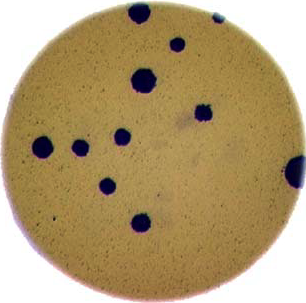

In [4]:
image = iio.imread(uri="data/colonies-01.tif")
image

As indicated above, this is a color image of dimensions 303x306. Check the dimensions of other .tif and .bmp medical images.




In [ ]:
image2 = iio.imread(uri="data/colonies-01.bmp")
image2

In [5]:
# Your code here!
import numpy as np

np.size(image)


278154

## DICOM Images

`pydicom` is the most commonly used Python packags for reading and writing files in the **DICOM** (Digital Imaging and Communications in Medicine) format.


In [6]:
!pip install pydicom
import pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 20.3 MB/s eta 0:00:00


Read the *chest_Xray.dcm* image and extract the image data.

In [14]:
ds = pydicom.dcmread("data/chest_Xray.dcm")
#print(ds)
type(ds)
image = ds.pixel_array

In [12]:
ds = pydicom.dcmread("data/chest_Xray.dcm")

# Inspect the dataset
print(ds)
print(f"Rows: {ds.Rows}, Columns: {ds.Columns}, BitsAllocated: {ds.BitsAllocated}")

# Check if the pixel data matches the expected size
expected_pixel_size = ds.Rows * ds.Columns * ds.BitsAllocated // 8
actual_pixel_size = len(ds.PixelData)

print(f"Expected size: {expected_pixel_size}, Actual size: {actual_pixel_size}")



Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 212
(0002,0001) File Meta Information Version       OB: b'\x01\x00'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.12.2.1107.5.8.99.515349.836549.79844850.2001102915283800
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.804.114118.3
(0002,0013) Implementation Version Name         SH: 'eFilm/UCDavisLib'
(0002,0016) Source Application Entity Title     AE: '\x02\x00'
-------------------------------------------------
(0008,0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.8.99.515349.836549.79844850.2001102915283800
(0008,0020) Study Date                          DA: '20011024'
(0008,0022) Acquisition Date        

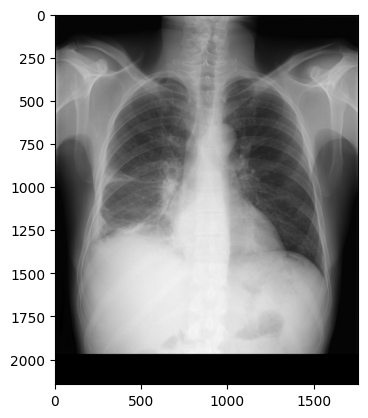

In [15]:
from matplotlib import pyplot as plt
plt.imshow(image, 'gray')

Besides the image, DICOM files also have image metadata about the patient, clinician, dates, IDs and image data such as correspondence between world and image coordinates.

In [16]:
from prettytable import PrettyTable
# Create a table to display the attributes
table = PrettyTable()
table.field_names = ["Tag", "VR", "Name", "Value"]

example_fields = [
    "PatientName",
    "StudyDate",
    "Modality",
    "ImageType"]

# Iterate through the dataset and add rows to the table
for field in example_fields:
  if field in ds:
    element =ds[field]
    table.add_row([element.tag, element.VR, element.name, element.value])

# Print the table
print(table)

+-------------+----+----------------+------------------------+
|     Tag     | VR |      Name      |         Value          |
+-------------+----+----------------+------------------------+
| (0010,0010) | PN | Patient's Name | ABREU, ALBINO JORGE F. |
| (0008,0020) | DA |   Study Date   |        20011024        |
| (0008,0060) | CS |    Modality    |           DR           |
+-------------+----+----------------+------------------------+


## 3D DICOM Images

For 3D images, things get a bit more complicated as standard DICOM files are only prepared to store 2D data. A 3D images (composed of a stack of 2D CTs) is given on *ct_folder*.

Let's inspect one of these DICOMs!

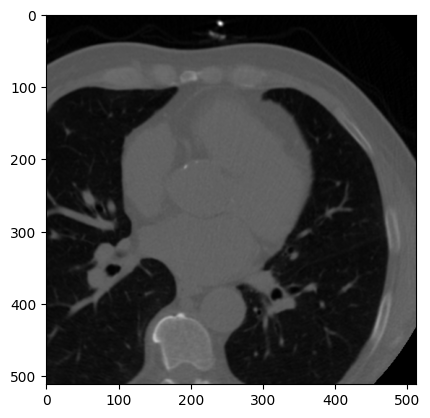

In [18]:
import os
dcm_list = os.listdir('data/cardiac_ct')

ds = pydicom.dcmread(f'data/cardiac_ct/{dcm_list[0]}')

image = ds.pixel_array

# In CT images you often need to rescale intensities to obtain the original image
image = image * ds.RescaleSlope + ds.RescaleIntercept
plt.imshow(image, 'gray')


Now let's take a look at some of the spacing fields.

In [19]:
# This is the spacing between pixels in mm
print(ds.PixelSpacing)

# This is the thickness in mm of the acquisition of this slice (not to be confused with the spacing between two adjacent slices!)
print(ds.SliceThickness)

# These are the world coordinates of pixel (0,0) in this slice
print(ds.ImagePositionPatient)

[0.482421875, 0.482421875]
3
[-92.2587890625, -314.2587890625, -1022.5]


Now write the code to structure the DICOM slices into a 3D array by making use of the above fields creating a new 3D array *image_3d*

In [23]:
# Your code here! # Email João Pedro Pedrosa

# Path to the folder containing the DICOM slices
dicom_folder = "data/cardiac_ct"

# List all DICOM files in the folder
dicom_files = [f for f in os.listdir(dicom_folder)]

# Sort the DICOM files (assuming they are numbered or named in order)
dicom_files.sort()

# Initialize a list to hold each slice
slices = []

# Read each DICOM slice
for dicom_file in dicom_files:
    # Read the DICOM file
    ds = pydicom.dcmread(os.path.join(dicom_folder, dicom_file))

    # Extract the pixel array for the slice
    image_slice = ds.pixel_array

    # Ensure that the slice dimensions match
    assert image_slice.shape == (ds.Rows, ds.Columns), f"Slice dimensions mismatch in {dicom_file}"

    # Append the slice to the list
    slices.append(image_slice)

# Stack the slices into a 3D array (along the third dimension)
image_3d = np.stack(slices, axis=-1)

# Verify the shape of the resulting 3D array
print(f"3D Image Shape: {image_3d.shape}")

3D Image Shape: (512, 512, 99)


Based on your code, you should now be able to slice the image in the coronal and sagittal planes with the below code.

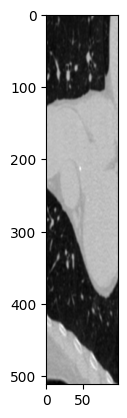

In [24]:
plt.imshow(image_3d[image_3d.shape[0]//2, :, :], 'gray')

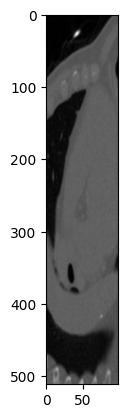

In [26]:
plt.imshow(image_3d[:, image_3d.shape[1]//2, :], 'gray')

# NIfTI images

While DICOM is the **clinical** standard, carrying around so many individual files can be tricky and there are some alternatives often used in imaging labs such as NIfTI and NRRD formats. Here we'll look at the former.

We can start by setting up and importing the required packages.

In [27]:
import nibabel as nib

Now we can import a full 3D abdominal CT with a single line of code.

In [30]:
img_nii = nib.load('data/abdominal_ct.nii.gz')

As for DICOMs, these files contain the image but also associated metadata. We'll look at the image first.

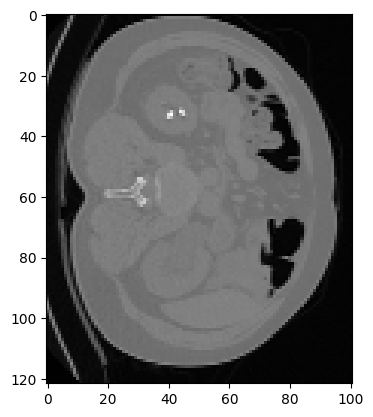

In [31]:
from matplotlib import pyplot as plt

image = img_nii.get_fdata()

fig, axes = plt.subplots()
slicenum = 80
axes.imshow(image[:, :, slicenum], 'gray')

We can also look at the metadata.
Pixel dimensions are given by the pixdim attribute (which here have x, y and z dimensions)
Orientations can also be obtained through the pixdim, s_row and qoffset attributes but since our 3D image is already built these fields are not so commonly needed.

In [32]:
header = img_nii.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 122 101 112   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -177.95633
qoffset_y       : 11.319
qoffset_z     

Great, now you know the basics of imaging format. Feel free to move to part B!